In [ ]:
# lets import the Library
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# lets read the dataset
data = pd.read_csv('/content/train.csv')

NameError: ignored

In [ ]:
# lets check the head of the dataset
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


## Q1. Does Older Employees getting more Promotion than Younger Employees?

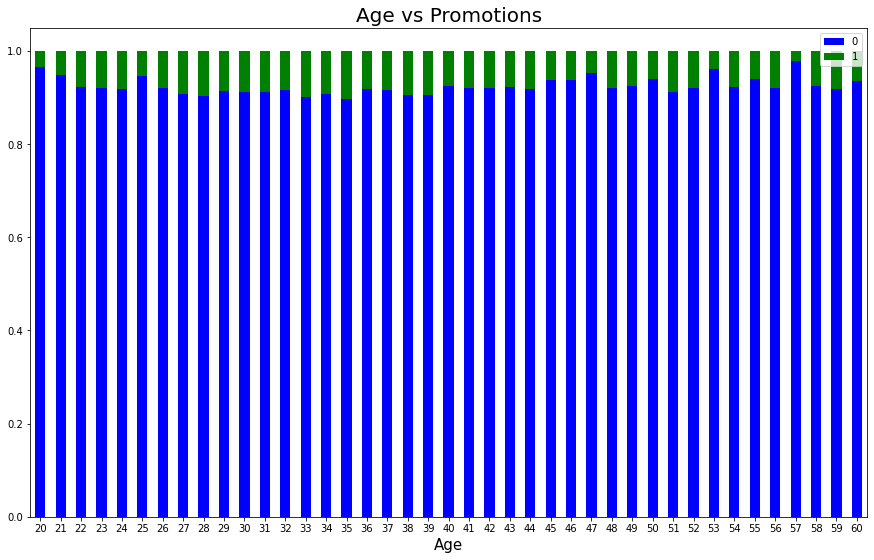

In [ ]:
promotion = pd.crosstab(data['age'], data['is_promoted'])
promotion.div(promotion.sum(1).astype('float'), axis=0).plot(kind='bar', stacked=True, figsize=(15, 9), color=['blue', 'green'])

plt.title('Age vs Promotions', fontsize=20)
plt.xticks(rotation=360)
plt.xlabel('Age', fontsize=15)
plt.legend()
plt.show()

So, no. We can see from the above that the company is promoting employees irrespective of their age whether they are a fresher or a senior employee, it does not matter.

## Q2. What is the Probability to get Promoted, If an employeed has won an award?

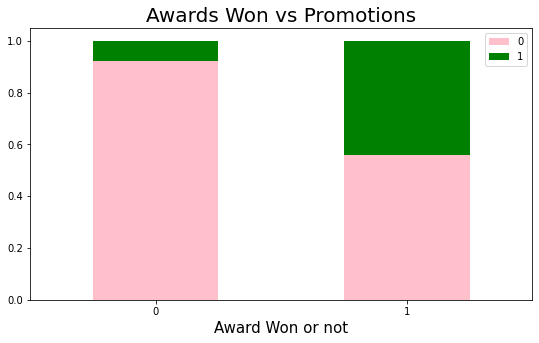

71.32519280205655

In [ ]:
promotion = pd.crosstab(data['awards_won?'], data['is_promoted'])
promotion.div(promotion.sum(1).astype('float'), axis=0).plot(kind='bar', stacked=True, figsize=(9, 5), color=['pink', 'green'])

plt.title('Awards Won vs Promotions', fontsize=20)
plt.xticks(rotation=360)
plt.xlabel('Award Won or not', fontsize=15)
plt.legend()
plt.show()


So yes, there is a high chance of getting promoted if an employee has won an award.

## Q3. What is the Average Training Score of those Employees who got Promotion?

In [ ]:
data1 = data[data.is_promoted != 0]
#data1 is the data of promoted employees
data1["avg_training_score"].mean()

71.32519280205655

The Average Training Score of those Employees who got Promotion is 71.32519280205655

## Q4. What is the Impact of Gender in Promotions?

In [ ]:
gender_promotion_df = data.groupby(['gender', 'is_promoted']).agg({'employee_id': 'sum'})
gender_promotion_df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

employee_id
gender is_promoted             
f      0              91.079977
       1               8.920023
m      0              91.626468
       1               8.373532

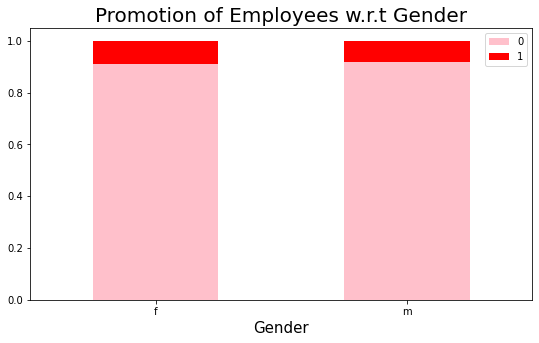

In [ ]:
promotion = pd.crosstab(data['gender'], data['is_promoted'])
promotion.div(promotion.sum(1).astype('float'), axis=0).plot(kind='bar', stacked=True, figsize=(9, 5), color=['pink', 'red'])

plt.title('Promotion of Employees w.r.t Gender', fontsize=20)
plt.xticks(rotation=360)
plt.xlabel('Gender', fontsize=15)
plt.legend()
plt.show()

So, we can see from the above table and visuailization that female employees are getting promoted as equally as male employees infact a little bit higher than male employees. So gender has no impact in promotion.

## Q5. What is the Probability of Freshers getting Promoted?

In [ ]:
data2 = data1[data1.length_of_service == 1]
total_promotion = len(data1.index)
fresher_promotion = len(data2.index)
prob_of_prom = fresher_promotion/total_promotion
prob_of_prom

0.08076263924592973

Probability of Freshers getting Promoted is 0.08076263924592973